# Interactive proofs TL;DR

An interactive proof is a game between two players: the Prover and the Verifier.

The Prover wants to convince the Verifier that a certain statement is true.

The winning conditions are slightly assymetric: The Prover wins if it can convince the Verifier, especially if the statement is actually false! The Verifier wins if it accepts a true statement or if it exposes the Prover of lying.

There is a small island in which **both parties win**: The Prover convinces the Verifier of a true statement.

# Statements

A statement is any precise mathematical fact that can be true or false.

"1 + 1 = 2"

"2 + 2 = 5"

_Statements don't have to be true._

"A cube is a 3D object"

"This puzzle has a solution"

"I know the solution to this puzzle"

The last one is interesting because it talks about knowledge of something. Later we will make this mathematically precise.

In [1]:
# We will use this statement for our exercises

# "I know a number x such that 2 + x = 5"
def statement(witness):
    return 2 + witness == 5

# Does an honest Prover always win?

If the Prover is honest, then it should be able to convince the Verifier. The Verifier has to play along instead of rejecting every attempt.

This should work almost all the time. Prover and Verifier are probabilistic algorithms.

We call this **completeness** and it is one of three important properties of interactive proof systems.

## Exercise

What is a simple protocol for our statement that is complete?

In [3]:
class CompleteProver:
    def send(self):
        pass  # TODO: What to send?
        
class CompleteVerifier:
    def verify(self, x):
        pass  # TODO: How to verify?
        
prover = CompleteProver()
verifier = CompleteVerifier()
x = prover.send()

if verifier.verify(x):
    print("Convinced 👌")
else:
    print("Not convinced... 🤨")

Not convinced... 🤨


# Does a vigilant Verifier never lose?

If the Prover is dishonest, it shouldn't be able to deceive the Verifier. Even if the Prover disregards the protocol. The Verifier has to do minimal checking instead of accepting every attempt.

Again, this should work most of the time.

We call this **soundness** and it is the second important property of interactive proof systems.

## Exercise

What is a simple protocol for our statement that is sound but incomplete?

In [4]:
class SoundProver:
    def send(self):
        pass  # TODO: What to send?
        
class SoundVerifier:
    def verify(self, x):
        pass  # TODO: How to verify?
        
prover = SoundProver()
verifier = SoundVerifier()
x = prover.send()

if verifier.verify(x):
    print("Convinced 👌")
else:
    print("Not convinced... 🤨")

Not convinced... 🤨


## Exercise

What is a simple protocol for our statement that is sound and complete?

Combining soundness and completeness makes it much harder to "cheat" in protocol design.

In [5]:
class CorrectProver:
    def send(self):
        pass  # TODO: What to send?
        
class CorrectVerifier:
    def verify(self, x):
        pass  # TODO: How to verify?
        
prover = CorrectProver()
verifier = CorrectVerifier()
x = prover.send()

if verifier.verify(x):
    print("Convinced 👌")
else:
    print("Not convinced... 🤨")

Not convinced... 🤨


# Knowledge of something

Prover and Verifier are algorithms. What does it mean for them to "know" something?

Think of it this way: **An algorithm knows what it can (easily) compute.**

Obviously it knows its initial data and anything passed to it from the outside world.

It learns new knowledge by computing new values based on what it already knows. This makes sense: Humans also make these deriviations.

Is there a commonly accepted definition for an "easy" computation? Yes! **Polynomial computations**.

Polynomial computations _(the complexity class P)_ are seen as easy / feasible / efficient. Addition is easy. Finding a path between two points in a graph is easy. Verifying the solution to a sudoku is easy.

The opposite are exponential computations _(the complexity class NP)_ which are seen as hard / infeasible / inefficient. Finding the shortest path that visits all points in a graph exactly once is hard. Coming up with a solution to a sudoku is hard. Computing the discrete logarithm of a curve point is hard.

An algorithm can learn polynomially, but not exponentially. Exponential learning would be cheating. A human equivalent would be to come up with mathematical proofs of artistic masterpieces on the spot. Some humans do that, sometimes, but we don't want to assume that our algorithms are geniuses! Also, exponential power would far surpass even the greatest human geniuses.

# An interesting problem

We need a non-trivial problem to work through the remaining sections, so here you have it:

A graph consists of nodes and edges. Coloring a graph means to assign a color to each node. For each edge, adjacent nodes must have a different color.

Every graph can be four-colored, but not every graph can be three-colored! Three coloring is an NP-complete problem. An exponential computation!

![image](graph.png)

# Interactive proof for three coloring

Here is an interactive proof system for three coloring.

The Verifier chooses a random edge and challenges the Prover to color it. The Verifier then checks if this colored edge is valid.

If the Verifier is not convinced by one check, it can challenge the Prover as often as it wants. To prevent any leak of knowledge about the coloring, the Prover randomizes the "world" it is in, i.e., it swaps the colors.

This system is complete because the Verifier can ask as much as it wants and the Prover will always be able to provide a satisfactory answer.

Is this sound? (See exercise below)

In [6]:
import random

graph = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (1, 6)] + \
    [(2, 7), (3, 8), (4, 9), (5, 10)] + \
    [(6, 8), (6, 9), (7, 9), (7, 10), (8, 10)]

coloring = {1: 0, 7: 0, 8: 0, 4: 0, 2: 1, 6: 1, 5: 1, 3: 2, 9: 2, 10: 2}
index_to_color = [["r", "b", "g"], ["r", "g", "b"],
                  ["b", "r", "g"], ["b", "g", "r"],
                  ["g", "r", "b"], ["g", "b", "r"]]

class ColorProver:
    def __init__(self, coloring):
        self.coloring = coloring
        self.world = random.randrange(6)
    
    def color_edge(self, edge):
        left_index = self.coloring[edge[0]]
        left_color = index_to_color[self.world][left_index]
        right_index = self.coloring[edge[1]]
        right_color = index_to_color[self.world][right_index]
        return (left_color, right_color)

class ColorVerifier:
    def __init__(self, graph):
        self.graph = graph
    
    def random_edge(self):
        return random.choice(self.graph)
    
    def verify(self, colored_edge):
        return colored_edge[0] != colored_edge[1]
    

# Feel free to rerun this multiple times!

prover = ColorProver(coloring)
verifier = ColorVerifier(graph)
edge = verifier.random_edge()
print("Edge: {}".format(edge))
colored_edge = prover.color_edge(edge)
print("Colored edge: {}".format(colored_edge))

if verifier.verify(colored_edge):
    print("Convinced 👌")
else:
    print("Not convinced... 🤨")

Edge: (2, 3)
Colored edge: ('b', 'r')
Convinced 👌


## Exercise

What does the Color Verifier know and why? What does it not know and why?

In [6]:
known = None # TODO: Change
unknown = None # TODO: Change

# Extracting knowledge as proof of knowledge

The Verifier wants to accept only if the Prover really knows what it claims to know. How can we make sure of that?

We do a thought experiment: The Prover is a black box that claims to contain a secret. We are the Verifier and would like to learn the secret. If we can interact with this box through the protocol to learn the secret, then the box must have contained it to begin with!

In the physical world this is obvious, but there is some interesting logic in the mathematical world.

In the beginning, the Verifier doesn't know the secret. No polynomial computation leads to it. Then the Verifier interacts with the Prover in a _polynomial_ way. The Verifier is not allowed to do any genius-level exponential stuff. This interaction is one of the aforementioned polynomial computations, but this time the Prover is there. The Verifier learns the secret. Ergo, the secret came from the Prover!

## Exercise

Extract the secret coloring from the prover, showing that this interactive proof system is sound.

_Hint: Use the fact that the Prover is an object that can be manipulated at your whim_

_Hint: Use the methods from the protocol in a different order / number_

In [16]:
def extract_coloring(prover):
    coloring = {}
    
    # TODO: Add function body
        
    return coloring


prover = ColorProver(coloring)
extract = extract_coloring(prover)

# The original coloring is in terms of indices, not in terms of colors
# Using indices is equivalent to using colors, but we can't check for equality with our extracted coloring
# So we map the coloring from indices to colors, using the "world" that the Prover used
mapped_coloring = {}
for node, color_id in coloring.items():
    mapped_coloring[node] = index_to_color[prover.world][color_id]

if mapped_coloring == extract:
    print("Extraction successful 😈")
else:
    print("I didn't believe in this extraction business from the get-go 🤨")

I didn't believe in this extraction business from the get-go 🤨


# Zero knowledge

The Prover wants to convince the Verifier without revealing any information. This seems impossible.

Let's rephrase the task: The Verifier is not supposed to learn anything that it doesn't already know.

We do another thought experiment: At the start of the protocol, the Verifier knows what it can compute in polynomial time, without access to the Prover. We show that anything the Verifier might learn during the protocol, the Verifier already knew before the protocol started!

Our protocols are probabilistic, so our situation is slightly more complicated.

Prover and Verifier exchange messages, called the transcript. This randomly changes every time, so we have a random distribution of transcripts. The Verifier uses some algorithm to extract information from this distribution.

If the incoming distribution of transcripts is the same, then the outgoing distribution of extracted information is the same.

To show that the Verifier already knew everything it could extract, we show that the Verifier can compute identical-looking transcripts. This happens without access to the Prover and in polynomial time.

Ergo, the Verifier ends up extracting information that it already knows and our protocol is zero-knowledge.

## Exercise

Run the following code to get a feeling for what the (real) transcript distribution looks like. Adjust the number of iterations and see how it affects the plot.

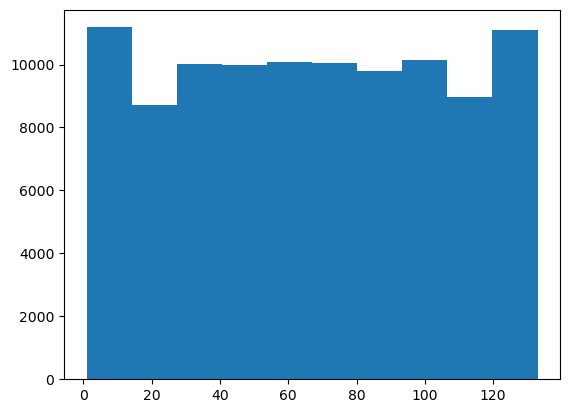

In [76]:
import numpy as np
import matplotlib.pyplot as plt

verifier = ColorVerifier(graph)

def real_transcript():
    prover = ColorProver(coloring)
    edge = verifier.random_edge()
    colored_edge = prover.color_edge(edge)
    return (edge, colored_edge)

def color_to_int(color):
    return {"r": 0, "g": 1, "b": 2}[color]

number_edges = len(graph)
number_colors = 3

def compress(edge, colored_edge):
    e_prime = graph.index(edge) * number_colors ** 2
    c0_prime = color_to_int(colored_edge[0]) * number_colors
    c1_prime = color_to_int(colored_edge[1])
    return e_prime + c0_prime + c1_prime


real_data = []

for _ in range(0, None):  # TODO: Change
    real_data.append(compress(*real_transcript()))
    
plt.hist(real_data)
plt.show()

## Exercise

Run the following code the generate a fake distribution of transcripts. Notice how the algorithm has no access to the Prover. It just produces random edges and colors. Compare with the real transcripts. Are the distributions distinguishable?

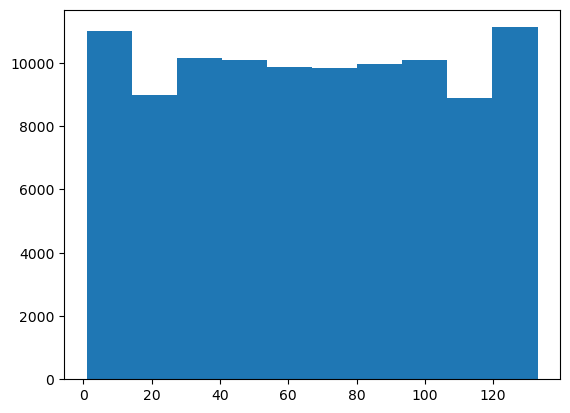

In [75]:
def int_to_color(i):
    return ["r", "g", "b"][i]

def fake_transcript():
    e = random.randrange(0, number_edges)
    edge = graph[e]
    c0 = random.randrange(0, number_colors)
    if random.random() > 0.5:
        c1 = (c0 + 1) % 3
    else:
        c1 = (c0 - 1) % 3
    colored_edge = (int_to_color(c0), int_to_color(c1))
    
    return (edge, colored_edge)


fake_data = []

for _ in range(0, None):  # TODO: Change
    fake_data.append(compress(*fake_transcript()))
    
plt.hist(fake_data)
plt.show()